
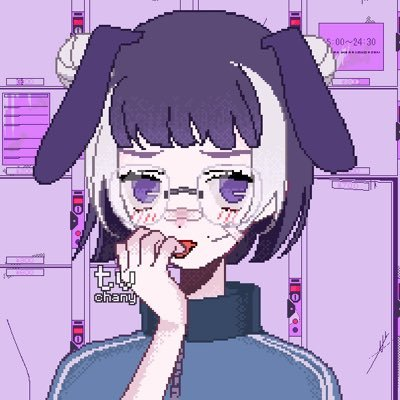

In [52]:
import requests
import urllib
import pandas as pd
import folium
from folium.features import CustomIcon

df=pd.read_excel('/content/ずとまよLIVE歴Python.xlsx') #ファイルのパス適宜修正

width=40 #アイコン幅適宜修正
height=40 #アイコン高さ適宜修正
icon = CustomIcon(icon_image = '/content/icon.jpg',icon_size = (width, height),icon_anchor = (width/2, height/2),popup_anchor = (0, -height/2)) #マーカーアイコンのパス適宜修正

WIDTH = 500 #マーカー幅適宜修正

map=folium.Map(location=[35.690921, 139.700258], zoom_start=5)

makeurl="https://msearch.gsi.go.jp/address-search/AddressSearch?q=" #国土地理院APIリンク

for i,r in df.iterrows():
  s_quote=urllib.parse.quote(r['住所'])
  url=makeurl+s_quote
  response=requests.get(url)
  lon=response.json()[0]["geometry"]["coordinates"][0]
  lat=response.json()[0]["geometry"]["coordinates"][1]
  livespace = r['会場'].replace('_x000D_', '<br />')
  livename = r['LIVE'].replace('_x000D_', '<br />')
  popup_content = f"""
    <span style="color:purple; font-weight:bold; font-size:15px;">{livespace}</span><br />
    <span style="color:green;font-size:12px;">{livename}</span>
    """
  popup = folium.Popup(popup_content, max_width=WIDTH)
  folium.Marker(location=[lat,lon],popup=popup,icon=icon).add_to(map)

map